<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#BigData---Final-Project" data-toc-modified-id="BigData---Final-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>BigData - Final Project</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Exploring-The-Data" data-toc-modified-id="Exploring-The-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploring The Data</a></span><ul class="toc-item"><li><span><a href="#first-and-last-40-rows" data-toc-modified-id="first-and-last-40-rows-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>first and last 40 rows</a></span></li><li><span><a href="#Number-of-ob|servations" data-toc-modified-id="Number-of-ob|servations-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Number of ob|servations</a></span></li><li><span><a href="#deduce-period" data-toc-modified-id="deduce-period-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>deduce period</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Statistics</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Correlation</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Average-opening/closing-prices-by-period" data-toc-modified-id="Average-opening/closing-prices-by-period-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Average opening/closing prices by period</a></span></li><li><span><a href="#stock-price-changes-by-period" data-toc-modified-id="stock-price-changes-by-period-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>stock price changes by period</a></span></li><li><span><a href="#daily-return" data-toc-modified-id="daily-return-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>daily return</a></span></li><li><span><a href="#highest-daily-return" data-toc-modified-id="highest-daily-return-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>highest daily return</a></span></li><li><span><a href="#Average-daily-return-for-different-periods" data-toc-modified-id="Average-daily-return-for-different-periods-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Average daily return for different periods</a></span></li></ul></li><li><span><a href="#Return-rate-of-each-stock-(per-week,-month,-year)" data-toc-modified-id="Return-rate-of-each-stock-(per-week,-month,-year)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Return rate of each stock (per week, month, year)</a></span></li></ul></li></ul></div>

__AUTHORS__:
  - Théo Perinet (22172 - theo.perinet)
  - Mathieu Rivier (23553 - mathieu.rivier)
  - Marc Monteil (23742 - marc.monteil)

# BigData - Final Project

In [2]:
# cell for autoreload includes
%load_ext autoreload
%autoreload 2

We load the python file containing the class Stocks.
This file use the file containing the class Stock.
This classes contain all our work.

In [3]:
from stocks import Stocks
# The warnings are due to the includes in the file

22/05/22 18:39:46 WARN Utils: Your hostname, toto-Virtual-Machine resolves to a loopback address: 127.0.1.1; using 172.20.120.145 instead (on interface eth0)
22/05/22 18:39:46 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/22 18:39:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Load data

We define the schema of the datas contained in files

In [4]:
from pyspark.sql.types import DoubleType, StringType, DateType, StructType, StructField

In [5]:
data_schema = StructType([
    StructField('Date', DateType(), True),
    StructField('High', DoubleType(), True),
    StructField('Low', DoubleType(), True),
    StructField('Open', DoubleType(), True),
    StructField('Close', DoubleType(), True),
    StructField('Volume', DoubleType(), True),
    StructField('Adj Close', DoubleType(), True),
    StructField('company_name', StringType(), True)
])

We load each stock using the Stocks class.  
As we do not provide the list of files to load, the class will load all the csv files in the directory "stocks_data/"

In [6]:
stocks = Stocks(header=True, delimiter=',', schema=data_schema)

## Exploring The Data

### first and last 40 rows

We show the first and last 40 rows of each stock price

In [7]:
stocks.call_explore_function("get_df_abstract")

###########################
########## APPLE ##########
###########################

First 40 rows:


+----------+----+----+----+-----+----------+---------+------------+
|      Date|High| Low|Open|Close|    Volume|Adj Close|company_name|
+----------+----+----+----+-----+----------+---------+------------+
|2017-01-03|29.0|29.0|29.0| 29.0|1.151276E8|     27.0|       APPLE|
|2017-01-04|29.0|29.0|29.0| 29.0| 8.44724E7|     27.0|       APPLE|
|2017-01-05|29.0|29.0|29.0| 29.0| 8.87744E7|     27.0|       APPLE|
|2017-01-06|30.0|29.0|29.0| 29.0|1.270076E8|     28.0|       APPLE|
|2017-01-09|30.0|29.0|29.0| 30.0|1.342476E8|     28.0|       APPLE|
|2017-01-10|30.0|30.0|30.0| 30.0| 9.78484E7|     28.0|       APPLE|
|2017-01-11|30.0|30.0|30.0| 30.0|1.103544E8|     28.0|       APPLE|
|2017-01-12|30.0|30.0|30.0| 30.0|1.083448E8|     28.0|       APPLE|
|2017-01-13|30.0|30.0|30.0| 30.0|1.044476E8|     28.0|       APPLE|
|2017-01-17|30.0|30.0|30.0| 30.0|1.377592E8|     28.0|       APPLE|
|2017-01-18|30.0|30.0|30.0| 30.0|  9.4852E7|     28.0|       APPLE|
|2017-01-19|30.0|30.0|30.0| 30.0|1.023892E8|    

+----------+-----+-----+-----+-----+---------+---------+------------+
|      Date| High|  Low| Open|Close|   Volume|Adj Close|company_name|
+----------+-----+-----+-----+-----+---------+---------+------------+
|2020-12-02|286.0|281.0|285.0|286.0|4113594.0|    286.0|    FACEBOOK|
|2020-12-01|289.0|279.0|279.0|287.0|2.07389E7|    287.0|    FACEBOOK|
|2020-11-30|278.0|271.0|276.0|277.0|1.66933E7|    277.0|    FACEBOOK|
|2020-11-27|279.0|275.0|277.0|278.0|7808400.0|    278.0|    FACEBOOK|
|2020-11-25|280.0|273.0|278.0|276.0| 1.2467E7|    276.0|    FACEBOOK|
|2020-11-24|278.0|268.0|268.0|277.0|1.69304E7|    277.0|    FACEBOOK|
|2020-11-23|271.0|265.0|271.0|268.0|2.09908E7|    268.0|    FACEBOOK|
|2020-11-20|273.0|269.0|273.0|270.0|1.81147E7|    270.0|    FACEBOOK|
|2020-11-19|273.0|269.0|271.0|273.0|1.29637E7|    273.0|    FACEBOOK|
|2020-11-18|277.0|272.0|275.0|272.0|1.21529E7|    272.0|    FACEBOOK|
|2020-11-17|278.0|273.0|278.0|275.0|1.50403E7|    275.0|    FACEBOOK|
|2020-11-16|279.0|27

+----------+----+----+----+-----+---------+---------+------------+
|      Date|High| Low|Open|Close|   Volume|Adj Close|company_name|
+----------+----+----+----+-----+---------+---------+------------+
|2017-01-03|63.0|62.0|63.0| 63.0|2.06941E7|     59.0|   MICROSOFT|
|2017-01-04|63.0|62.0|62.0| 62.0|  2.134E7|     58.0|   MICROSOFT|
|2017-01-05|63.0|62.0|62.0| 62.0| 2.4876E7|     58.0|   MICROSOFT|
|2017-01-06|63.0|62.0|62.0| 63.0|1.99229E7|     59.0|   MICROSOFT|
|2017-01-09|63.0|63.0|63.0| 63.0|2.03827E7|     59.0|   MICROSOFT|
|2017-01-10|63.0|62.0|63.0| 63.0| 1.8593E7|     59.0|   MICROSOFT|
|2017-01-11|63.0|62.0|63.0| 63.0|2.15173E7|     59.0|   MICROSOFT|
|2017-01-12|63.0|62.0|63.0| 63.0|2.09682E7|     59.0|   MICROSOFT|
|2017-01-13|63.0|62.0|63.0| 63.0|1.94223E7|     59.0|   MICROSOFT|
|2017-01-17|63.0|62.0|63.0| 63.0| 2.0664E7|     59.0|   MICROSOFT|
|2017-01-18|63.0|62.0|63.0| 63.0|1.96701E7|     59.0|   MICROSOFT|
|2017-01-19|63.0|62.0|62.0| 62.0|1.84517E7|     58.0|   MICROS

+----------+------+------+------+------+---------+---------+------------+
|      Date|  High|   Low|  Open| Close|   Volume|Adj Close|company_name|
+----------+------+------+------+------+---------+---------+------------+
|2020-12-02|1809.0|1789.0|1798.0|1807.0| 285821.0|   1807.0|      GOOGLE|
|2020-12-01|1825.0|1769.0|1774.0|1798.0|1736900.0|   1798.0|      GOOGLE|
|2020-11-30|1788.0|1755.0|1781.0|1761.0|1823800.0|   1761.0|      GOOGLE|
|2020-11-27|1804.0|1772.0|1773.0|1793.0| 884900.0|   1793.0|      GOOGLE|
|2020-11-25|1779.0|1757.0|1773.0|1771.0|1045800.0|   1771.0|      GOOGLE|
|2020-11-24|1772.0|1728.0|1731.0|1769.0|1578000.0|   1769.0|      GOOGLE|
|2020-11-23|1754.0|1718.0|1750.0|1735.0|2161600.0|   1735.0|      GOOGLE|
|2020-11-20|1774.0|1742.0|1765.0|1742.0|2313500.0|   1742.0|      GOOGLE|
|2020-11-19|1770.0|1737.0|1738.0|1764.0|1249900.0|   1764.0|      GOOGLE|
|2020-11-18|1773.0|1746.0|1765.0|1747.0|1173500.0|   1747.0|      GOOGLE|
|2020-11-17|1785.0|1767.0|1777.0|1770.

First 40 rows:
+----------+-----+-----+-----+-----+---------+---------+------------+
|      Date| High|  Low| Open|Close|   Volume|Adj Close|company_name|
+----------+-----+-----+-----+-----+---------+---------+------------+
|2017-01-03|759.0|748.0|758.0|754.0|3521100.0|    754.0|      AMAZON|
|2017-01-04|760.0|754.0|758.0|757.0|2510500.0|    757.0|      AMAZON|
|2017-01-05|782.0|760.0|762.0|780.0|5830100.0|    780.0|      AMAZON|
|2017-01-06|799.0|778.0|782.0|796.0|5986200.0|    796.0|      AMAZON|
|2017-01-09|802.0|792.0|798.0|797.0|3446100.0|    797.0|      AMAZON|
|2017-01-10|798.0|790.0|797.0|796.0|2558400.0|    796.0|      AMAZON|
|2017-01-11|800.0|790.0|794.0|799.0|2992800.0|    799.0|      AMAZON|
|2017-01-12|814.0|800.0|800.0|814.0|4873900.0|    814.0|      AMAZON|
|2017-01-13|822.0|811.0|814.0|817.0|3791900.0|    817.0|      AMAZON|
|2017-01-17|816.0|803.0|816.0|810.0|3670500.0|    810.0|      AMAZON|
|2017-01-18|812.0|804.0|810.0|807.0|2354200.0|    807.0|      AMAZON|
|2017

### Number of observations

We show the number of observations of each stock

In [8]:
stocks.call_explore_function("nb_rows")

###########################
########## APPLE ##########
###########################

Number of rows: 987

##############################
########## FACEBOOK ##########
##############################

Number of rows: 987

###########################
########## TESLA ##########
###########################

Number of rows: 987

###############################
########## MICROSOFT ##########
###############################

Number of rows: 987

############################
########## GOOGLE ##########
############################

Number of rows: 987

##########################
########## ZOOM ##########
##########################

Number of rows: 411

############################
########## AMAZON ##########
############################

Number of rows: 987



### deduce period

We get the period of each stock

In [9]:
stocks.call_explore_function("print_period")

###########################
########## APPLE ##########
###########################



22/05/22 18:40:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 18:40:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
##############################
########## FACEBOOK ##########
##############################



22/05/22 18:40:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 18:40:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
###########################
########## TESLA ##########
###########################



22/05/22 18:40:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 18:40:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
###############################
########## MICROSOFT ##########
###############################



22/05/22 18:40:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 18:40:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
############################
########## GOOGLE ##########
############################



22/05/22 18:40:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 18:40:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
##########################
########## ZOOM ##########
##########################



22/05/22 18:40:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 18:40:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
############################
########## AMAZON ##########
############################

Period: day


22/05/22 18:40:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/22 18:40:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


### Statistics

We show statistics (min, max, standard, deviation) for each columns of each stock

In [10]:
stocks.call_explore_function("get_stats")

###########################
########## APPLE ##########
###########################



Stock Stats:
+-------+-----+-----+-----+-----+------------+---------+------------+
|summary| High|  Low| Open|Close|      Volume|Adj Close|company_name|
+-------+-----+-----+-----+-----+------------+---------+------------+
|  count|987.0|987.0|987.0|987.0|       987.0|    987.0|         987|
|   mean| 57.0| 56.0| 57.0| 57.0|1.26770017E8|     55.0|        null|
| stddev| 24.0| 23.0| 24.0| 23.0| 6.0439452E7|     24.0|        null|
|    min| 29.0| 29.0| 29.0| 29.0|   2.01978E7|     27.0|       APPLE|
|    25%| 42.0| 41.0| 41.0| 41.0|   8.67032E7|     39.0|        null|
|    50%| 48.0| 48.0| 48.0| 48.0|  1.110428E8|     46.0|        null|
|    75%| 66.0| 65.0| 65.0| 66.0|  1.499814E8|     64.0|        null|
|    max|138.0|131.0|138.0|134.0|    4.4794E8|    134.0|       APPLE|
+-------+-----+-----+-----+-----+------------+---------+------------+

##############################
########## FACEBOOK ##########
##############################

Stock Stats:
+-------+-----+-----+-----+-----+------

### Missing values

We show the number of missing value for each columns of each stock

In [11]:
stocks.call_explore_function("get_missing")

###########################
########## APPLE ##########
###########################

Missing Data per column:
+----+---+----+-----+------+---------+------------+
|High|Low|Open|Close|Volume|Adj Close|company_name|
+----+---+----+-----+------+---------+------------+
|   0|  0|   0|    0|     0|        0|           0|
+----+---+----+-----+------+---------+------------+

##############################
########## FACEBOOK ##########
##############################

Missing Data per column:
+----+---+----+-----+------+---------+------------+
|High|Low|Open|Close|Volume|Adj Close|company_name|
+----+---+----+-----+------+---------+------------+
|   0|  0|   0|    0|     0|        0|           0|
+----+---+----+-----+------+---------+------------+

###########################
########## TESLA ##########
###########################

Missing Data per column:
+----+---+----+-----+------+---------+------------+
|High|Low|Open|Close|Volume|Adj Close|company_name|
+----+---+----+-----+------+-------

### Correlation

We show the correlation between each columns of each stock

In [12]:
stocks.call_explore_function("correlation")

###########################
########## APPLE ##########
###########################

               High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.999291  0.999602  0.999489  0.167148   0.999444
Low        0.999291  1.000000  0.999414  0.999528  0.142933   0.999436
Open       0.999602  0.999414  1.000000  0.999042  0.156805   0.998971
Close      0.999489  0.999528  0.999042  1.000000  0.154060   0.999917
Volume     0.167148  0.142933  0.156805  0.154060  1.000000   0.154374
Adj Close  0.999444  0.999436  0.998971  0.999917  0.154374   1.000000

##############################
########## FACEBOOK ##########
##############################

               High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.997640  0.998428  0.998292 -0.001898   0.998292
Low        0.997640  1.000000  0.998188  0.998417 -0.044616   0.998417
Open       0.998428  0.998188  1.000000  0.996690 -0.021466   0.996690
Close      0.998292  0.998417  0.996690

## Analysis

### Average opening/closing prices by period

We show the average of the opening and closing prices by week, month and year.

In [13]:
stocks.call_analysis_function("print_get_oc_avg")

###########################
########## APPLE ##########
###########################



+----+-----------+------------------+------------------+
|Date|Week_number|         Open_mean|        Close_mean|
+----+-----------+------------------+------------------+
|2017|          1| 29.02187490463257| 29.16812515258789|
|2017|          2| 29.67349967956543|29.806999969482423|
|2017|          3|29.886874675750732| 29.98562479019165|
|2017|          4|30.188999938964844|30.290999984741212|
|2017|          5|31.270000076293947|31.466999816894532|
|2017|          6|32.756500244140625| 32.91999893188476|
|2017|          7| 33.64200057983398| 33.74449996948242|
|2017|          8| 34.12187480926514|           34.1875|
|2017|          9| 34.54449996948242| 34.62249984741211|
|2017|         10|34.768499755859374|34.783999633789065|
|2017|         11|  34.9640007019043| 34.96650085449219|
|2017|         12| 35.25599975585938| 35.21399993896485|
|2017|         13| 35.59449996948242| 35.81949996948242|
|2017|         14| 35.95999984741211|35.974500274658205|
|2017|         15| 35.628126144

+----+-----------------+------------------+
|Date|        Open_mean|        Close_mean|
+----+-----------------+------------------+
|2017|62.85924295980142|62.863258969736286|
|2018|63.43669347269127| 63.46198397328654|
|2019|54.60562690855965|54.706039686051625|
|2020|259.2505243980833|259.50230853035725|
+----+-----------------+------------------+

###############################
########## MICROSOFT ##########
###############################

+----+-----------+------------------+------------------+
|Date|Week_number|         Open_mean|        Close_mean|
+----+-----------+------------------+------------------+
|2017|          1|  62.4399995803833| 62.50500011444092|
|2017|          2| 62.75599975585938| 62.75199966430664|
|2017|          3|  62.5649995803833|62.517499923706055|
|2017|          4| 63.87200088500977| 64.04199905395508|
|2017|          5| 64.33200073242188| 64.04199981689453|
|2017|          6|63.716000366210935|63.693999481201175|
|2017|          7| 64.47200012207031|

+----+------------------+------------------+
|Date|         Open_mean|        Close_mean|
+----+------------------+------------------+
|2019| 80.39499985769893| 80.23938206876262|
|2020|251.14446795549514|251.74615088859852|
+----+------------------+------------------+

############################
########## AMAZON ##########
############################

+----+-----------+-----------------+-----------------+
|Date|Week_number|        Open_mean|       Close_mean|
+----+-----------+-----------------+-----------------+
|2017|          1|765.0549926757812|771.8224945068359|
|2017|          2|800.5779907226563|804.5240112304688|
|2017|          3|812.6200103759766|808.6424865722656|
|2017|          4|825.8239990234375|830.3520141601563|
|2017|          5|  825.85400390625|827.2719970703125|
|2017|          6| 815.443994140625|817.7340087890625|
|2017|          7|837.2920043945312|    840.966015625|
|2017|          8|852.0125122070312|852.3699951171875|
|2017|          9|849.4320068359375|

### Stock price changes by period

We show the stock prices changes by day, month and year.

In [14]:
stocks.call_analysis_function("print_price_change")

###########################
########## APPLE ##########
###########################

+---------------+--------------------+
|Date_period_day|        price_change|
+---------------+--------------------+
|     2017-01-03| 0.08749961853027344|
|     2017-01-04|0.042499542236328125|
|     2017-01-05|  0.1725006103515625|
|     2017-01-06|   0.282501220703125|
|     2017-01-09| 0.26000022888183594|
|     2017-01-10| 0.08500099182128906|
|     2017-01-11|  0.2525005340576172|
|     2017-01-12| 0.08749961853027344|
|     2017-01-13|-0.01749992370605...|
|     2017-01-17| 0.41500091552734375|
|     2017-01-18|-0.00250053405761...|
|     2017-01-19| 0.09499931335449219|
|     2017-01-20|-0.11249923706054688|
|     2017-01-23|0.020000457763671875|
|     2017-01-24| 0.10499954223632812|
|     2017-01-25| 0.36499977111816406|
|     2017-01-26| 0.06750106811523438|
|     2017-01-27| -0.0475006103515625|
|     2017-01-30| 0.17499923706054688|
|     2017-01-31|0.049999237060546875|
+---------------+-

+----------------+------------------+
|Date_period_year|      price_change|
+----------------+------------------+
|            2017|             22.75|
|            2018| 15.44000244140625|
|            2019|58.149993896484375|
|            2020| 55.34700012207031|
+----------------+------------------+

############################
########## GOOGLE ##########
############################

+---------------+-----------------+
|Date_period_day|     price_change|
+---------------+-----------------+
|     2017-01-03| 7.33001708984375|
|     2017-01-04|    -1.4599609375|
|     2017-01-05| 7.94000244140625|
|     2017-01-06| 10.8900146484375|
|     2017-01-09|             0.25|
|     2017-01-10|-3.07000732421875|
|     2017-01-11| 2.90997314453125|
|     2017-01-12|  -0.780029296875|
|     2017-01-13|  0.4000244140625|
|     2017-01-17|-2.47003173828125|
|     2017-01-18|   0.260009765625|
|     2017-01-19|-2.94500732421875|
|     2017-01-20|-1.88995361328125|
|     2017-01-23|12.05999755859

### Daily return

We show the daily return of each stock

In [15]:
stocks.call_analysis_function("print_daily_return")

###########################
########## APPLE ##########
###########################

+----------+--------------------+
|      Date|    daily_return_day|
+----------+--------------------+
|2017-01-03| 0.08749961853027344|
|2017-01-04|0.042499542236328125|
|2017-01-05|  0.1725006103515625|
|2017-01-06|   0.282501220703125|
|2017-01-09| 0.26000022888183594|
|2017-01-10| 0.08500099182128906|
|2017-01-11|  0.2525005340576172|
|2017-01-12| 0.08749961853027344|
|2017-01-13|-0.01749992370605...|
|2017-01-17| 0.41500091552734375|
|2017-01-18|-0.00250053405761...|
|2017-01-19| 0.09499931335449219|
|2017-01-20|-0.11249923706054688|
|2017-01-23|0.020000457763671875|
|2017-01-24| 0.10499954223632812|
|2017-01-25| 0.36499977111816406|
|2017-01-26| 0.06750106811523438|
|2017-01-27| -0.0475006103515625|
|2017-01-30| 0.17499923706054688|
|2017-01-31|0.049999237060546875|
+----------+--------------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########
###########

### Highest daily return

We show the highest daily return of each stock.  
The compagny with the highest daily return is shown on the first row.

In [16]:
stocks.get_max_daily_return()

{'AMAZON': 196.64013671875,
 'GOOGLE': 61.8299560546875,
 'TESLA': 53.71002197265625,
 'ZOOM': 34.470001220703125,
 'FACEBOOK': 19.910003662109375,
 'MICROSOFT': 11.330001831054688,
 'APPLE': 5.540000915527344}

### Average daily return

We show the average daily return by week, month and year.

In [17]:
stocks.call_analysis_function("print_daily_return_avg")

###########################
########## APPLE ##########
###########################

+----+-----------+---------------------+
|Date|Week_number|avg_daily_return_week|
+----+-----------+---------------------+
|2017|          1|  0.14625024795532227|
|2017|          2|  0.13350028991699148|
|2017|          3|  0.09875011444091797|
|2017|          4|   0.1020000457763679|
|2017|          5|  0.19699974060058523|
|2017|          6|  0.16349868774413778|
|2017|          7|  0.10249938964843608|
|2017|          8|  0.06562519073486328|
|2017|          9|  0.07799987792968466|
|2017|         10| 0.015499877929691763|
|2017|         11| 0.002500152587892046|
|2017|         12| -0.04199981689453125|
|2017|         13|  0.22500000000000142|
|2017|         14| 0.014500427246098013|
|2017|         15| -0.15000057220458984|
|2017|         16| -5.00488281254263...|
|2017|         17| -0.03000106811523...|
|2017|         18|    0.256500244140625|
|2017|         19|  0.33150024414062074|
|2017|       

+----+---------------------+
|Date|avg_daily_return_year|
+----+---------------------+
|2017|   0.0297213398602878|
|2018| -0.08836680864433788|
|2019|  0.04297613719151627|
|2020|  0.09681125362544662|
+----+---------------------+

############################
########## GOOGLE ##########
############################

+----+-----------+---------------------+
|Date|Week_number|avg_daily_return_week|
+----+-----------+---------------------+
|2017|          1|    6.175018310546875|
|2017|          2| -0.05800781250002274|
|2017|          3|  -1.7612457275390625|
|2017|          4|   0.5239990234374545|
|2017|          5|  -2.6329833984375455|
|2017|          6|   1.6039916992187955|
|2017|          7|   2.7179931640624773|
|2017|          8|    1.805023193359375|
|2017|          9|   0.8040283203124545|
|2017|         10|   1.9699829101563182|
|2017|         11|   0.6779907226562045|
|2017|         12|   -6.787988281250023|
|2017|         13|    3.614001464843682|
|2017|         14|  0.1

## Moving average

We calculate the moving average.  
The funcion asked is present in the sock.py file.

In [18]:
# TODO

## Correlation

We calculate the columns correlation between each stock.  
The funciton asked is present in the stocks.py file and is named "get_correlation".

In [19]:
stocks.print_correlations()

Correlation between each stock:

                          High       Low      Open     Close    Volume  \
APPLE x FACEBOOK      0.912895  0.906184  0.909371  0.909144  0.298512   
APPLE x TESLA         0.911359  0.908313  0.910112  0.909487  0.265007   
APPLE x MICROSOFT     0.941249  0.941732  0.940545  0.941466  0.667617   
APPLE x GOOGLE        0.925057  0.922942  0.923299  0.923820  0.550664   
APPLE x ZOOM          0.880889  0.878417  0.879419  0.879882  0.297100   
APPLE x AMAZON        0.929787  0.929455  0.929432  0.929286  0.534008   
FACEBOOK x TESLA      0.833103  0.824666  0.828630  0.828806  0.074380   
FACEBOOK x MICROSOFT  0.861134  0.853161  0.856749  0.857076  0.424883   
FACEBOOK x GOOGLE     0.901320  0.898514  0.899388  0.900084  0.462016   
FACEBOOK x ZOOM       0.854996  0.844254  0.851768  0.850006  0.291001   
FACEBOOK x AMAZON     0.868221  0.858656  0.863067  0.862811  0.510765   
TESLA x MICROSOFT     0.774382  0.770361  0.771923  0.772038  0.258514   
TESLA

## Return rate

We show the return rate of each stock in different periods (per week, month, year)

In [20]:
stocks.call_analysis_function("print_daily_return_rate_avg")

###########################
########## APPLE ##########
###########################

+----+-----------+----------------------+
|Date|Week_number|daily_return_rate_week|
+----+-----------+----------------------+
|2017|          1|    0.5039310810755969|
|2017|          2|     0.449897354065473|
|2017|          3|    0.3304129840014376|
|2017|          4|     0.337871562431973|
|2017|          5|    0.6299959709623807|
|2017|          6|    0.4991335659351578|
|2017|          7|   0.30467685595926564|
|2017|          8|   0.19232586457132195|
|2017|          9|   0.22579535960454467|
|2017|         10|    0.0445802322174676|
|2017|         11|  0.007150647917004178|
|2017|         12|  -0.11912814041686928|
|2017|         13|    0.6321201314610662|
|2017|         14|   0.04032376893111013|
|2017|         15|    -0.421017292901126|
|2017|         16|  -0.00141295054034...|
|2017|         17|  -0.08334903427098324|
|2017|         18|    0.7012897870617624|
|2017|         19|    0.868165324

+----+----------------------+
|Date|daily_return_rate_year|
+----+----------------------+
|2017|  0.041305854789324005|
|2018|  -0.08738603071736133|
|2019|  0.032972572604697166|
|2020|  0.050749011442581454|
+----+----------------------+

############################
########## GOOGLE ##########
############################

+----+-----------+----------------------+
|Date|Week_number|daily_return_rate_week|
+----+-----------+----------------------+
|2017|          1|    0.7845003879795882|
|2017|          2|  -0.00719007660488...|
|2017|          3|  -0.21845450266951685|
|2017|          4|   0.06341219006360892|
|2017|          5|   -0.3284668181493667|
|2017|          6|   0.19891263294058192|
|2017|          7|   0.33168019574818713|
|2017|          8|   0.21778952342068628|
|2017|          9|   0.09702472057775546|
|2017|         10|    0.2363710931691149|
|2017|         11|   0.08002968854904605|
|2017|         12|   -0.8130495689860024|
|2017|         13|    0.4391434765762226|

## Best return rate

We show the stock with the best return rate during a period (nonth and year).

In [21]:
# TODO

## Insights

### William’s R%

It is an indicator derived from stochastics but unlike stochastics, %R is not internally smoothed.

Like stochastics, it measures overbought/oversold levels (determined by an upper and a lower bound) and thus market breathlessness.


Analysis :

The indicator is read according to an overbought and oversold zone. Thus, when the indicator is in the extreme zone, the market is oversold or overbought. In other words, if the %R moves in the zone above 80, the market is dominated by buyers. Conversely, if the value moves in the zone below 20, the market is dominated by sellers.

In [80]:
stocks.call_insight_function("print_r_de_williams")

###########################
########## APPLE ##########
###########################

+----------+-----------------+
|      Date|    R_de_williams|
+----------+-----------------+
|2017-01-03|88.53501018062717|
|2017-01-04|71.99968610491072|
|2017-01-05|88.09522944512463|
|2017-01-06|92.64706212343906|
|2017-01-09|90.57810248551722|
|2017-01-10| 93.1477554541207|
|2017-01-11|96.51836810587301|
|2017-01-12|86.84718479669206|
|2017-01-13|82.78530551530159|
|2017-01-17|95.62047352403123|
|2017-01-18|89.26311292146382|
|2017-01-19|84.64816959695996|
|2017-01-20|87.59304835106585|
|2017-01-23|74.56456552252138|
|2017-01-24|67.69242958211433|
|2017-01-25|94.34444073979643|
|2017-01-26|88.17967841135571|
|2017-01-27|88.38849878146672|
|2017-01-30|80.80556981797933|
|2017-01-31|74.17052957383878|
+----------+-----------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########
##############################

+----------+-----------------+
|      Date|    R_de

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

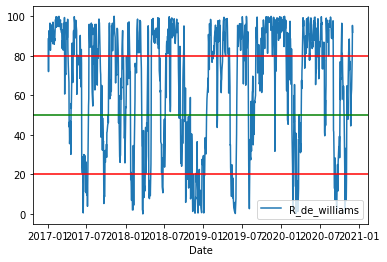

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

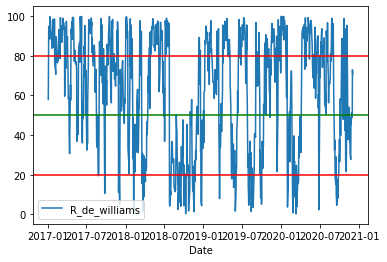

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

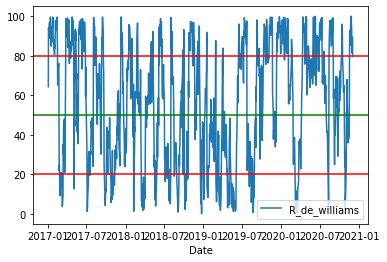

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

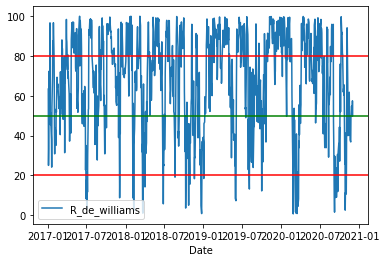

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

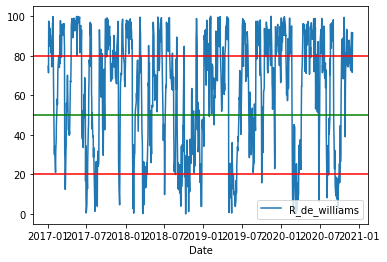

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

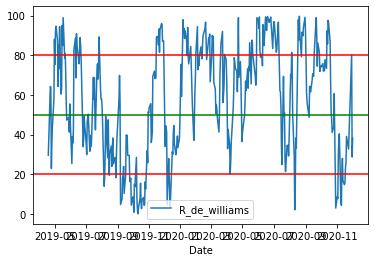

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

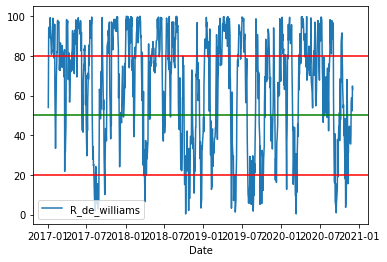

In [81]:
stocks.call_insight_function("plot_r_de_williams")

### Momentum and ROC

These two indicators are very similar in their philosophy. They measure the acceleration or deceleration of a trend. They often mark their peaks and troughs even before prices have reached their extremes.

Momentum and ROC compare the closing price to the price of a past session.

The difference lies in the way they are calculated. Momentum is obtained by subtracting a past price from the last known price, while ROC uses a division of the last price by a past price.

Analysis :

The periods (n) commonly used for calculating momentum and ROC are 12 and 25 days.

The faster these indicators rise, the faster and stronger the price rise. Conversely, the faster the indicators fall, the faster and more strongly the price falls.

In [82]:
stocks.call_insight_function("print_momentum")

###########################
########## APPLE ##########
###########################

+----------+-------------------+
|      Date|           momentum|
+----------+-------------------+
|2017-01-03|                0.0|
|2017-01-04| -0.032501220703125|
|2017-01-05|0.11499977111816406|
|2017-01-06| 0.4400005340576172|
|2017-01-09| 0.7099990844726562|
|2017-01-10| 0.7399997711181641|
|2017-01-11| 0.8999996185302734|
|2017-01-12| 0.7749996185302734|
|2017-01-13| 0.7224998474121094|
|2017-01-17| 0.8474998474121094|
|2017-01-18| 0.5199985504150391|
|2017-01-19|0.19750022888183594|
|2017-01-20| 0.2525005340576172|
|2017-01-23|0.08250045776367188|
|2017-01-24|0.18000030517578125|
|2017-01-25| 0.7099990844726562|
|2017-01-26| 0.4850006103515625|
|2017-01-27| 0.4874992370605469|
|2017-01-30| 0.4099998474121094|
|2017-01-31| 0.3924999237060547|
+----------+-------------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########
##############################

+--

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

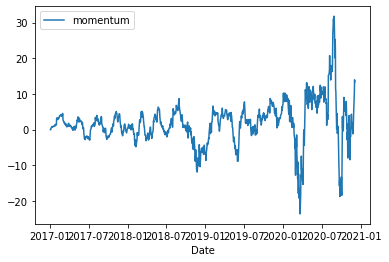

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

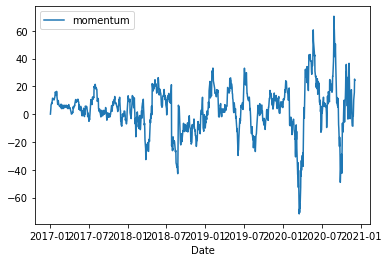

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

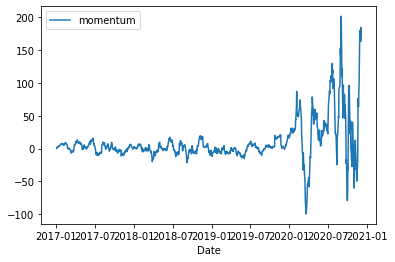

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

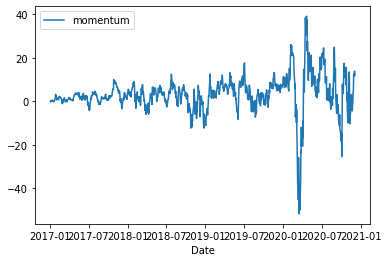

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

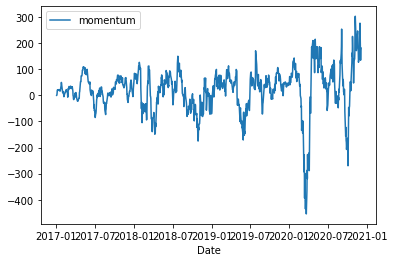

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

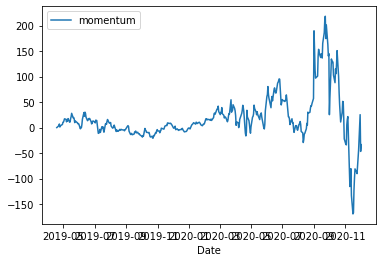

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

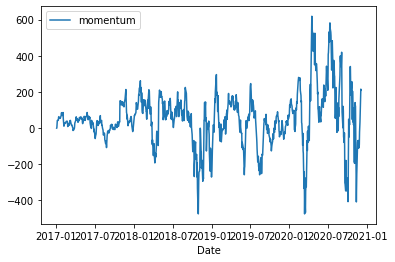

In [83]:
stocks.call_insight_function("plot_momentum")

In [84]:
stocks.call_insight_function("print_roc")

###########################
########## APPLE ##########
###########################

+----------+------------------+
|      Date|          momentum|
+----------+------------------+
|2017-01-03|               1.0|
|2017-01-04|0.9988807156168351|
|2017-01-05|1.0039603881052912|
|2017-01-06|1.0151528378227213|
|2017-01-09| 1.024451108915895|
|2017-01-10|1.0254842793421157|
|2017-01-11|1.0309943902438865|
|2017-01-12|1.0266896119965216|
|2017-01-13|1.0248816130149128|
|2017-01-17|1.0331467793675688|
|2017-01-18|1.0330606654106247|
|2017-01-19|1.0312526664290158|
|2017-01-20|1.0331467793675688|
|2017-01-23| 1.033835559651716|
|2017-01-24|1.0328885031824395|
|2017-01-25|1.0493327219308075|
|2017-01-26|1.0498493399867697|
|2017-01-27|1.0499353882580105|
|2017-01-30| 1.043049452163546|
|2017-01-31|1.0291747494289762|
+----------+------------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########
##############################

+----------+---------------

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

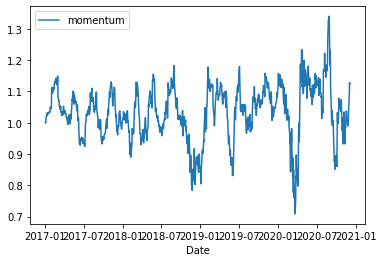

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

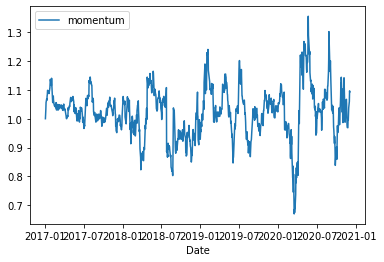

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

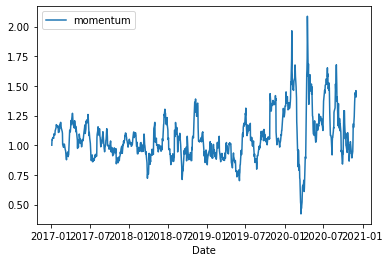

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

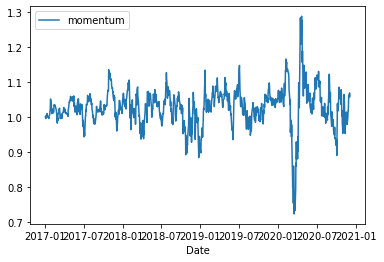

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

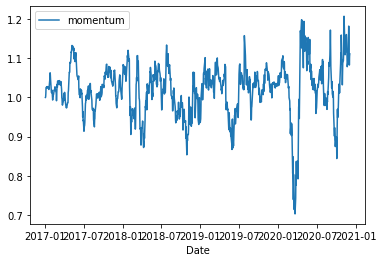

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

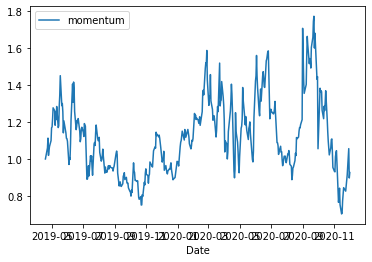

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

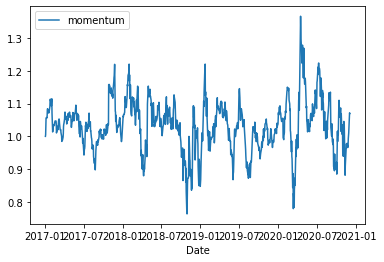

In [85]:
stocks.call_insight_function("plot_roc")

### Commodity Chanel Index

Developed by Donald R. Lambert, it was originally designed to identify turning points in commodity markets, which are cyclical. Its use has spread to all markets and at the same time has moved away from its original principles. Today, the CCI is a speed indicator, mainly used to set overbought/oversold levels and detect divergences. Therefore, it is found in the oscillator family.

The CCI calculates the difference between the price and its x-day average divided by 1.5% of the standard deviation.

Analysis :

When the CCI is above the +100 level, the trend is strongly bullish, which is a buy signal. Conversely, when the CCI is below -100, the trend is strongly bearish, which is a bearish signal.

This approach is interesting because it allows traders to intervene on a stock only during a strong trend.

In [86]:
stocks.call_insight_function("print_cci")

###########################
########## APPLE ##########
###########################

+----------+------------------+
|      Date|               CCI|
+----------+------------------+
|2017-01-03|              null|
|2017-01-04|133.33333333333334|
|2017-01-05|132.17410341847776|
|2017-01-06|180.37316138436918|
|2017-01-09|  180.852747700827|
|2017-01-10|130.95237387501984|
|2017-01-11|124.42113291224346|
|2017-01-12| 77.47421612469795|
|2017-01-13|  80.4352321875747|
|2017-01-17| 87.99233753300759|
|2017-01-18| 84.71617783836723|
|2017-01-19| 45.45988119924601|
|2017-01-20| 41.33129785288547|
|2017-01-23| 36.83574593879377|
|2017-01-24|15.249496509415394|
|2017-01-25| 90.31387578623224|
|2017-01-26|108.05060809141615|
|2017-01-27| 86.41619969611088|
|2017-01-30|40.134896871889865|
|2017-01-31|28.215875869173093|
+----------+------------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########
##############################

+----------+---------------

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

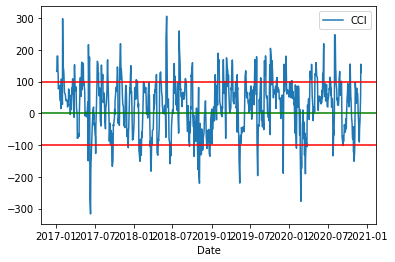

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

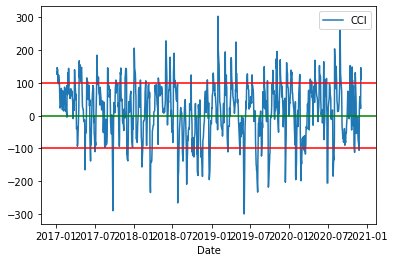

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

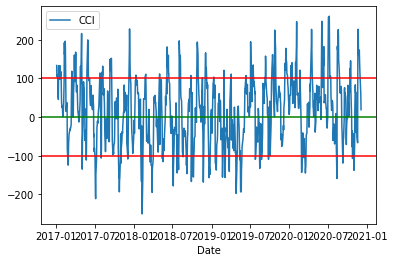

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

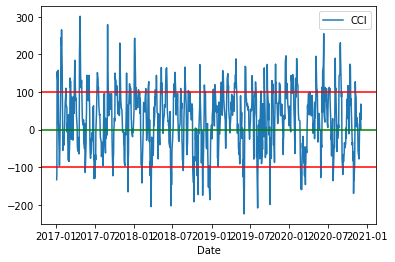

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

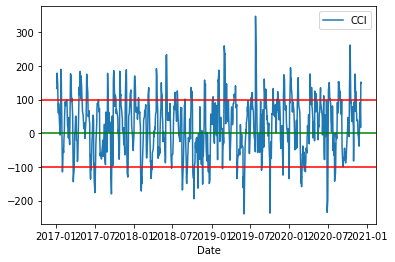

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

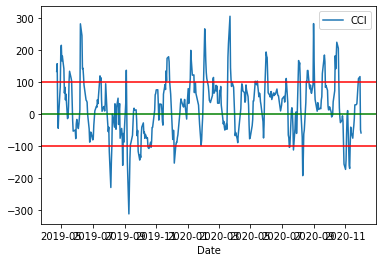

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

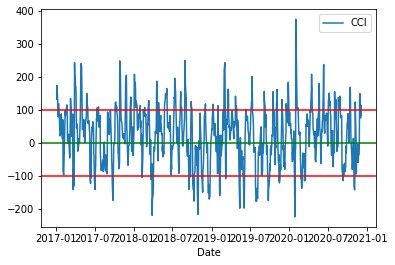

In [87]:
stocks.call_insight_function("plot_cci")

### Gravity center

The Centre of Gravity indicator is an oscillator developed by John F. Ehlers. This indicator is the result of the author's research on adaptive filters. This indicator gives the direction of the trend (up or down) and allows the identification of the reversal points of this trend.

Analysis:

1. When the indicator is in the positive zone, the latest prices remain higher than at the beginning of the period.

2. Conversely, when the indicator is in the negative zone, the latest prices remain lower than at the beginning of the period.

3. When the indicator crosses its signal line upwards, the trend turns upwards.

4. Conversely, when the indicator crosses its signal line on the downside, the trend turns downwards.


In [109]:
stocks.call_insight_function("print_gc")

###########################
########## APPLE ##########
###########################

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/toto/jupyterenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_24287/2752423965.py", line 1, in <cell line: 1>
    stocks.call_insight_function("print_gc")
  File "/home/toto/Desktop/project/BigData-Projet/stocks.py", line 95, in call_insight_function
    func()
  File "/home/toto/Desktop/project/BigData-Projet/stock.py", line 475, in print_gc
    self.get_gc(n_days).select("Date", "GC").show()
  File "/home/toto/Desktop/project/BigData-Projet/stock.py", line 469, in get_gc
    df = df.withColumn("A", func.dense_rank().over(w) * df["Close"])
  File "/home/toto/jupyterenv/lib/python3.10/site-packages/pyspark/sql/dataframe.py", line 2478, in withColumn
    return DataFrame(self._jdf.withColumn(colName, col._jc), self.sql_ctx)
  File "/home/toto/jupyterenv/lib/python3.10/site-packages/py4j/java_gateway.py", line 1321, in __ca

In [104]:
stocks.call_insight_function("plot_gc")

###########################
########## APPLE ##########
###########################

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/toto/jupyterenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_24287/4048080185.py", line 1, in <cell line: 1>
    stocks.call_insight_function("plot_gc")
  File "/home/toto/Desktop/project/BigData-Projet/stocks.py", line 95, in call_insight_function
    func()
  File "/home/toto/Desktop/project/BigData-Projet/stock.py", line 481, in plot_gc
    df = self.get_gc(n_days).select("Date", "GC").toPandas()
  File "/home/toto/Desktop/project/BigData-Projet/stock.py", line 469, in get_gc
    df = df.withColumn("A", func.row_number("Date").over(w))
TypeError: row_number() takes 0 positional arguments but 1 was given

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/toto/jupyterenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 1992, in showt

Source :  https://www.waldata.fr/indicateurs.asp?name=%R-de-Williams&Id=81#indic